<a href="https://colab.research.google.com/github/lucasdemouraa/LLMENADEBRACIS2025/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import entropy
from scipy.stats import mode

In [ ]:
url = "https://raw.githubusercontent.com/cleitonzila/analiseEnade/main/dados"

In [ ]:
modelo_4o = pd.read_csv(
    url + '/dados/modelo_4o.csv',
    header=None,
    index_col=0,
    names=["Questao", "Gabarito"] + [f"tentativa {str(i+1).zfill(2)}" for i in range(10)]
)

In [ ]:
modelo_o1 = pd.read_csv(
    url + '/dados/modelo_o1.csv',
    header=None,
    index_col=0,
    names=["Questao", "Gabarito"] + [f"tentativa {str(i+1).zfill(2)}" for i in range(10)]
)

In [ ]:
modelo_deepseek = pd.read_csv(
    url + '/dados/modelo_deepseek.csv',
    header=None,
    index_col=0,
    names=["Questao", "Gabarito"] + [f"tentativa {str(i+1).zfill(2)}" for i in range(10)]
)

In [ ]:
modelo_gamini_2_flash = pd.read_csv(
    url + '/dados/modelo_gemini_flash_2.csv',
    header=None,
    index_col=0,
    names=["Questao", "Gabarito"] + [f"tentativa {str(i+1).zfill(2)}" for i in range(10)]
)

In [ ]:
def taxa_de_acertos(df):
    tamanho = df.shape[0]
    taxa_acerto = []

    for i in range(10):
        tentativa_coluna = f"tentativa {str(i+1).zfill(2)}"
        taxa_acerto.append((df["Gabarito"] == df[tentativa_coluna]).sum() / tamanho)


    taxa_acerto = [float(x) for x in taxa_acerto]
    return taxa_acerto

In [ ]:
def grafico_taxa_de_acertos_linha(df):
    taxa_acerto = taxa_de_acertos(df)

    plt.figure(figsize=(10, 5))

    plt.plot(range(1, 11), taxa_acerto, 'o-', color='deepskyblue', alpha=0.7)

    plt.xlabel("Tentativa")
    plt.ylabel("Taxa de Acerto")
    plt.title("Evolução da Taxa de Acerto por Tentativa")
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

In [ ]:
def grafico_taxa_de_acertos(df):
    taxa_acerto = taxa_de_acertos(df)

    plt.figure(figsize=(10, 5))
    plt.scatter(range(1, 11), taxa_acerto, color='deepskyblue', alpha=0.7)

    plt.xlabel("Tentativa")
    plt.ylabel("Taxa de Acerto")
    plt.title("Evolução da Taxa de Acerto por Tentativa")
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

In [ ]:
def grafico_taxa_de_acertos_bar(df):
    taxa_acerto = taxa_de_acertos(df)

    plt.figure(figsize=(10, 5))
    plt.bar(range(1, 11), taxa_acerto, color='deepskyblue', alpha=0.7)

    plt.xlabel("Tentativa")
    plt.ylabel("Taxa de Acerto")
    plt.title("Evolução da Taxa de Acerto por Tentativa")
    plt.ylim(0, 1)
    plt.xticks(range(1, 11))
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

In [ ]:
def acuracia_por_questao(df):
    acuracia_por_questao = (df.iloc[:, 1:] == df["Gabarito"].values[:, None]).mean(axis=1) * 100
    df_acuracia_por_questao = pd.DataFrame({
        "Questão": df.index,
        "Acurácia (%)": acuracia_por_questao
    }).set_index("Questão")
    return df_acuracia_por_questao

In [ ]:
def grafico_acuracia_por_questao_com_reposta_majoritaria(df):
    df_acuracia_por_questao = acuracia_por_questao(df)
    df_item = df_item_mais_respondido_percentual(df)
    df_entropia = entropia_por_questao(df)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.bar(df_acuracia_por_questao.index,
            df_item['Frequencia (%)'],
            color='orangered',
            alpha=0.5,
            label='Frequência (%)')

    ax1.scatter(df_acuracia_por_questao.index,
                df_acuracia_por_questao["Acurácia (%)"],
                color='deepskyblue',
                alpha=0.7,
                label='Acurácia (%)')

    ax1.set_xlabel("Questão")
    ax1.set_ylabel("Frequência / Acurácia (%)")
    ax1.set_xticks(df_acuracia_por_questao.index)
    ax1.set_xticklabels(df_acuracia_por_questao.index, rotation=45)
    ax1.grid(axis='y', linestyle='--', alpha=0.6)

    ax2 = ax1.twinx()
    ax2.scatter(df_acuracia_por_questao.index,
                df_entropia["Entropia"],
                color='green',
                alpha=0.7,
                label='Entropia')
    ax2.set_ylabel("Entropia")
    ax2.set_ylim(0, 2)

    plt.title("Acurácia, Frequência (%) e Entropia por Questão")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

    plt.tight_layout()
    plt.show()

In [ ]:
def grafico_acuracia_por_questao(df):
    df_acuracia_por_questao = acuracia_por_questao(df)
    plt.figure(figsize=(12, 6))
    plt.scatter(df_acuracia_por_questao.index, df_acuracia_por_questao["Acurácia (%)"], color='deepskyblue', alpha=0.7)

    plt.xlabel("Questão")
    plt.ylabel("Acurácia (%)")
    plt.title("Acurácia por Questão")
    plt.ylim(0, 110)
    plt.xticks(df_acuracia_por_questao.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()


In [ ]:
def grafico_acuracia_por_questao_bar(df):
    df_acuracia_por_questao = acuracia_por_questao(df)
    plt.figure(figsize=(12, 6))
    plt.bar(df_acuracia_por_questao.index, df_acuracia_por_questao["Acurácia (%)"], color='deepskyblue', alpha=0.7)

    plt.xlabel("Questão")
    plt.ylabel("Acurácia (%)")
    plt.title("Acurácia por Questão")
    plt.ylim(0, 110)
    plt.xticks(df_acuracia_por_questao.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()


In [ ]:
def grafico_acuracia_por_questao_line(df):
    df_acuracia_por_questao = acuracia_por_questao(df)

    plt.figure(figsize=(12, 6))
    plt.plot(df_acuracia_por_questao.index, df_acuracia_por_questao["Acurácia (%)"], 'o-',color='deepskyblue', alpha=0.7)

    plt.xlabel("Questão")
    plt.ylabel("Acurácia (%)")
    plt.title("Acurácia por Questão")
    plt.ylim(0, 110)
    plt.xticks(df_acuracia_por_questao.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

In [ ]:
def grafico_entropia_por_questao(df):
    df_acuracia_por_questao = entropia_por_questao(df)
    plt.figure(figsize=(12, 6))
    plt.scatter(df_acuracia_por_questao.index, df_acuracia_por_questao["Entropia"], color='deepskyblue', alpha=0.7)

    plt.xlabel("Questão")
    plt.ylabel("Entropia")
    plt.title("Entropia por Questão")
    plt.ylim(0, 2)
    plt.xticks(df_acuracia_por_questao.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

In [ ]:
def grafico_entropia_por_questao_bar(df):
    df_acuracia_por_questao = entropia_por_questao(df)
    plt.figure(figsize=(12, 6))
    plt.bar(df_acuracia_por_questao.index, df_acuracia_por_questao["Entropia"], color='deepskyblue', alpha=0.7)

    plt.xlabel("Questão")
    plt.ylabel("Entropia")
    plt.title("Entropia por Questão")
    plt.ylim(0, 2)
    plt.xticks(df_acuracia_por_questao.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()


In [ ]:
def grafico_entropia_por_questao_linha(df):
    df_acuracia_por_questao = entropia_por_questao(df)

    plt.figure(figsize=(12, 6))
    plt.plot(df_acuracia_por_questao.index, df_acuracia_por_questao["Entropia"],'o-' ,color='deepskyblue', alpha=0.7)

    plt.xlabel("Questão")
    plt.ylabel("Entropia")
    plt.title("Entropia por Questão")
    plt.ylim(0, 2)
    plt.xticks(df_acuracia_por_questao.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

In [ ]:
def calculo_acuraria_agragada_com_intervalo_confianca(df):
    df_acuracia_por_questao = acuracia_por_questao(df)
    mean_accuracy = df_acuracia_por_questao["Acurácia (%)"].mean()

    confidence_level = 0.95
    n = df_acuracia_por_questao.shape[0]
    std_error = np.std(df_acuracia_por_questao["Acurácia (%)"], ddof=1) / np.sqrt(n)

    t_score = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_score * std_error

    ci_lower = mean_accuracy - margin_of_error
    ci_upper = mean_accuracy + margin_of_error

    df_aggregated_accuracy = pd.DataFrame({
        "Métrica": ["Média da Acurácia (%)", "Intervalo de Confiança Inferior (%)", "Intervalo de Confiança Superior (%)"],
        "Valor": [mean_accuracy, ci_lower, ci_upper]
    }).set_index("Métrica")
    return df_aggregated_accuracy

In [ ]:
def df_item_mais_respondido_percentual(df):
    resultados = []

    for questao in df.index:
        row = df.loc[questao]

        tentativas = row.iloc[1:]

        freq = tentativas.value_counts()

        item_mais_respondido = freq.idxmax()
        contagem_abs = freq.max()

        total_tentativas = len(tentativas)
        contagem_pct = (contagem_abs / total_tentativas) * 100

        resultados.append({
            "Questao": questao,
            "ItemMaisRespondido": item_mais_respondido,
            "Frequencia (%)": contagem_pct
        })

    df_resultado = pd.DataFrame(resultados).set_index("Questao")
    return df_resultado


In [ ]:
def acuracia_voto_majoritario(df):
    majority_answers = df.iloc[:, 1:].mode(axis=1)[0]
    majority_correct = (majority_answers == modelo_4o["Gabarito"]).astype(int)
    majority_vote_accuracy = majority_correct.mean() * 100

    df_majority_vote_accuracy = pd.DataFrame({
        "Métrica": ["Acurácia por Voto de Concenso (%)"],
        "Valor": [majority_vote_accuracy]
    }).set_index("Métrica")
    return df_majority_vote_accuracy


In [ ]:
def voto_majoritario(df):
    majority_answers = df.iloc[:, 1:].mode(axis=1)[0]
    majority_correct = (majority_answers == modelo_4o["Gabarito"]).astype(int)
    majority_vote_accuracy = majority_correct.mean() * 100

    df_majority_vote_accuracy = pd.DataFrame({
        "Métrica": ["Acurácia por Voto de Concenso (%)"],
        "Valor": [majority_vote_accuracy]
    }).set_index("Métrica")
    return df_majority_vote_accuracy


In [ ]:
def pior_melhor_acuracia_questao(df):
    acertos_por_tentativa = (df.iloc[:, 1:] == df["Gabarito"].values[:, None]).mean(axis=0) * 100

    melhor_desempenho_teste = acertos_por_tentativa.max()
    pior_desempenho_teste = acertos_por_tentativa.min()

    df_teste_desempenho = pd.DataFrame({
        "Métrica": ["Melhor Desempenho no Teste (%)", "Pior Desempenho no Teste (%)"],
        "Valor": [melhor_desempenho_teste, pior_desempenho_teste]
    }).set_index("Métrica")

    return df_teste_desempenho

In [ ]:
def entropia_por_questao(df):
    entropies = []

    for questao in df.index:
        row = df[df.index == questao]

        row_tentativas = row.iloc[:, 1:]

        frequencias = row_tentativas.iloc[0].value_counts()

        lista_frequencias = [
            frequencias.get(letra, 0)
            for letra in ["A", "B", "C", "D", "E", "X"]
        ]

        entropia_val = float(entropy(lista_frequencias, base=2))

        entropies.append(entropia_val)

    df_entropia_por_questao = pd.DataFrame({
        "Questão": df.index,
        "Entropia": entropies
    }).set_index("Questão")

    return df_entropia_por_questao

In [ ]:
def grafico_correlacao_acuracia_entropia(df):
    df_merged = acuracia_por_questao(df).join(entropia_por_questao(df), how='inner')
    corr_pearson = df_merged["Acurácia (%)"].corr(df_merged["Entropia"])

    plt.figure(figsize=(8, 6))
    plt.scatter(df_merged["Entropia"], df_merged["Acurácia (%)"])

    plt.xlabel("Entropia")
    plt.ylabel("Acurácia (%)")
    plt.title(f"Correlação entre Entropia e Acurácia (r = {corr_pearson:.2f})")
    plt.grid(True)

    plt.show()

    return corr_pearson


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def frequencia_respostas(df):
    opcoes = ['A', 'B', 'C', 'D', 'E', 'X']
    cores = {
        'A': '#1f77b4',  # Azul
        'B': '#ff7f0e',  # Laranja
        'C': '#2ca02c',  # Verde
        'D': '#d62728',  # Vermelho
        'E': '#9467bd',  # Roxo
        'X': '#8c564b'   # Marrom
    }
    mapeamento_opcoes = {opcao: i for i, opcao in enumerate(opcoes)}

    fig, ax = plt.subplots(figsize=(12, 3))

    for idx, row in df.iterrows():
        questao = row.name
        respostas = row[2:].dropna()

        for resposta in respostas:
            if resposta in mapeamento_opcoes:
                y_valor_base = mapeamento_opcoes[resposta]

                jitter_x = np.random.uniform(-0.2, 0.2)
                jitter_y = np.random.uniform(-0.1, 0.1)

                x_valor = questao + jitter_x
                y_valor = y_valor_base + jitter_y

                ax.scatter(
                    x_valor,
                    y_valor,
                    color=cores[resposta],
                    alpha=0.6,
                    edgecolors='black',
                    s=100
                )

    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index, rotation=90)
    ax.set_yticks(range(len(opcoes)))
    ax.set_yticklabels(opcoes)
    ax.set_xlabel("Questões")
    ax.set_ylabel("Opções de Resposta")
    ax.set_title("Distribuição das Respostas por Questão")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    legend_elements = [
        Line2D([0], [0],
               marker='o',
               color='w',
               markerfacecolor=cores[op],
               markersize=10,
               label=op)
        for op in opcoes
    ]
    ax.legend(
        handles=legend_elements,
        title="Opções",
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.show()


In [ ]:
def calcular_metricas(df):
    grafico_taxa_de_acertos(df)
    #grafico_acuracia_por_questao(df)
    # grafico_acuracia_por_questao_com_reposta_majoritaria(df)
    #grafico_entropia_por_questao(df)
    grafico_taxa_de_acertos_bar(df)
    # grafico_acuracia_por_questao_bar(df)
    # grafico_entropia_por_questao_bar(df)
    #grafico_entropia_por_questao_linha(df)
    #grafico_taxa_de_acertos_linha(df)
    # grafico_correlacao_acuracia_entropia(df)
    # frequencia_respostas(df)
    #print(calculo_acuraria_agragada_com_intervalo_confianca(df))
    #print(acuracia_voto_majoritario(df))
    #print(pior_melhor_acuracia_questao(df))
    #print(entropia_por_questao(df))

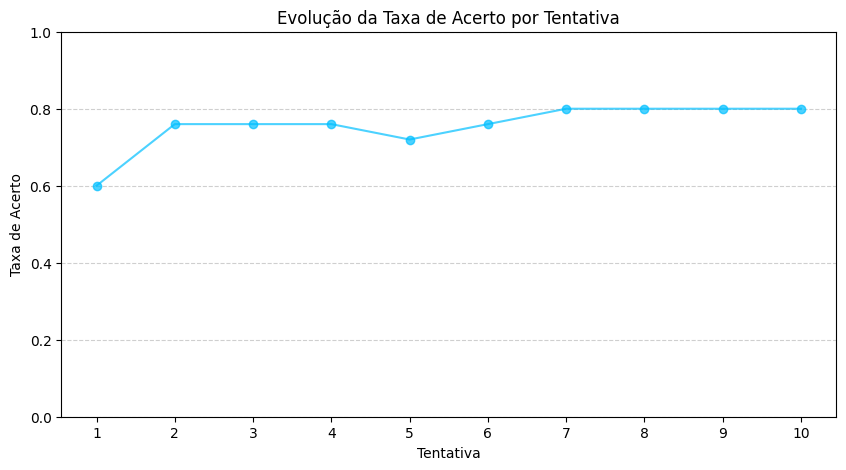

In [ ]:
# calcular_metricas(modelo_4o)
grafico_taxa_de_acertos_linha(modelo_o1)

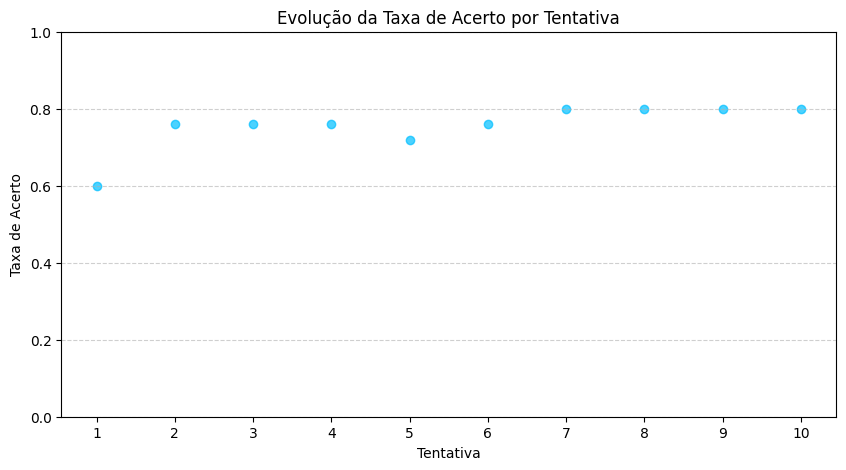

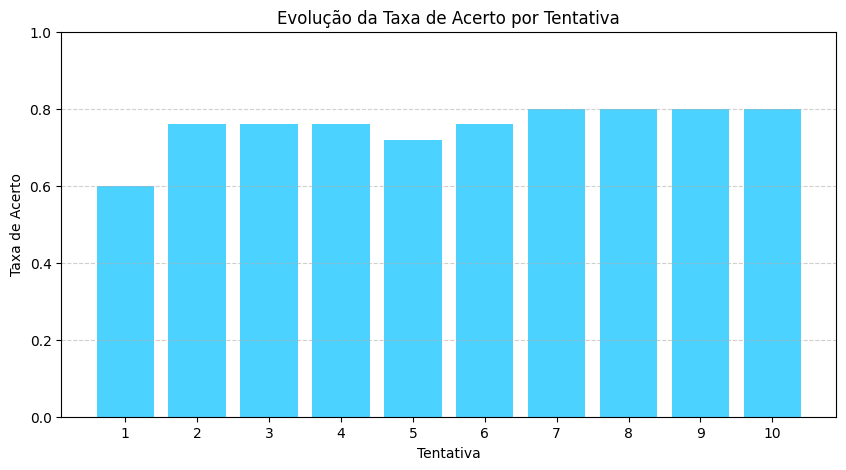

In [ ]:
calcular_metricas(modelo_o1)

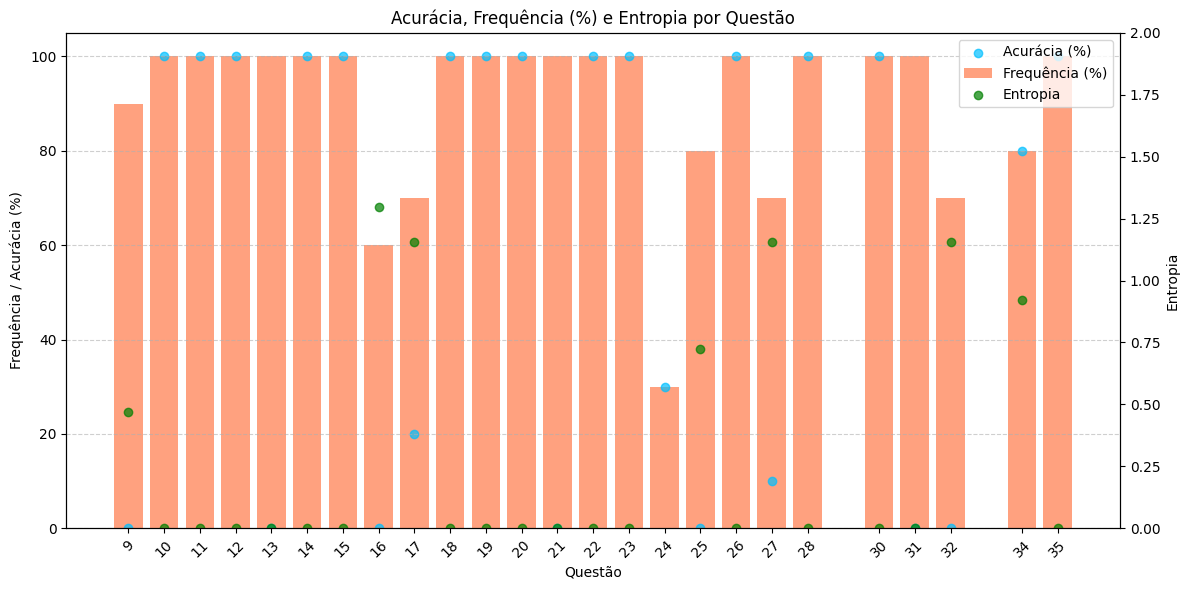

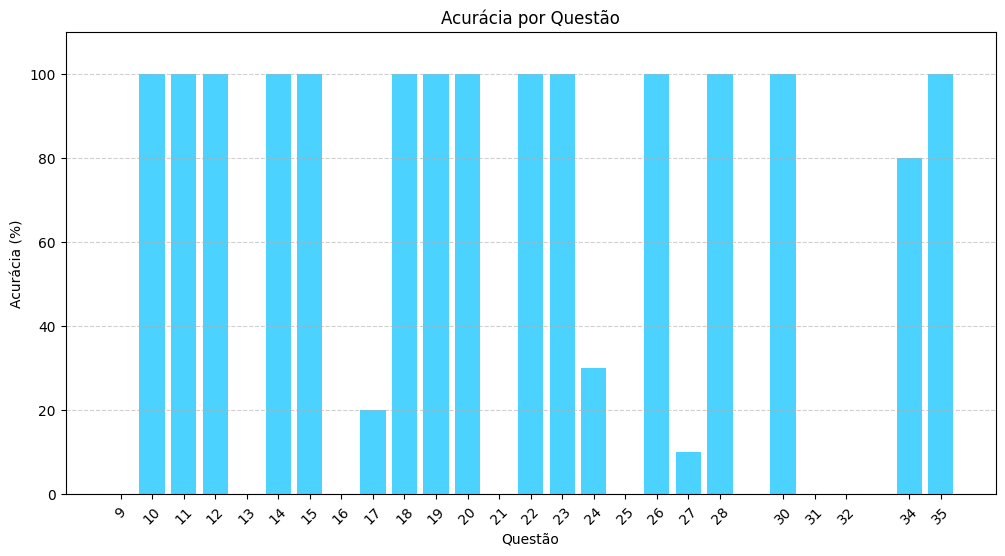

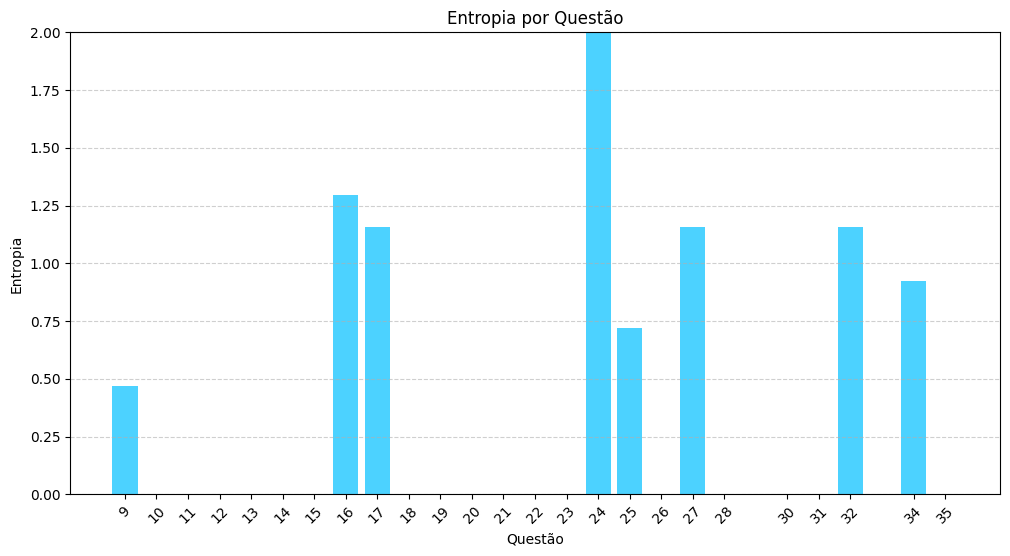

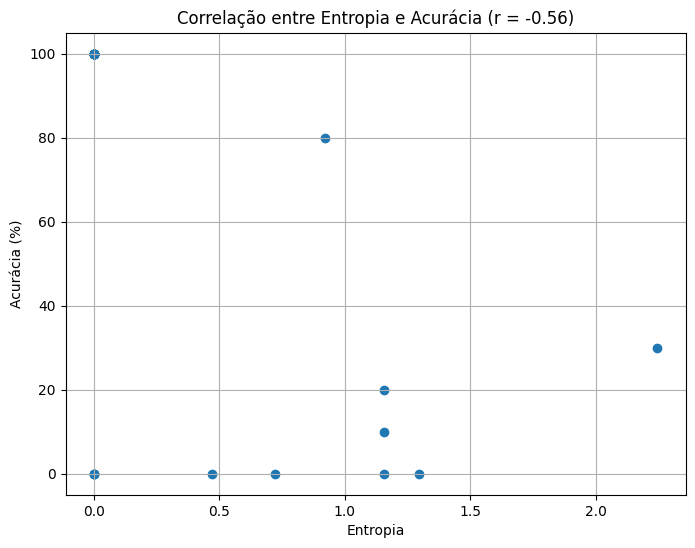

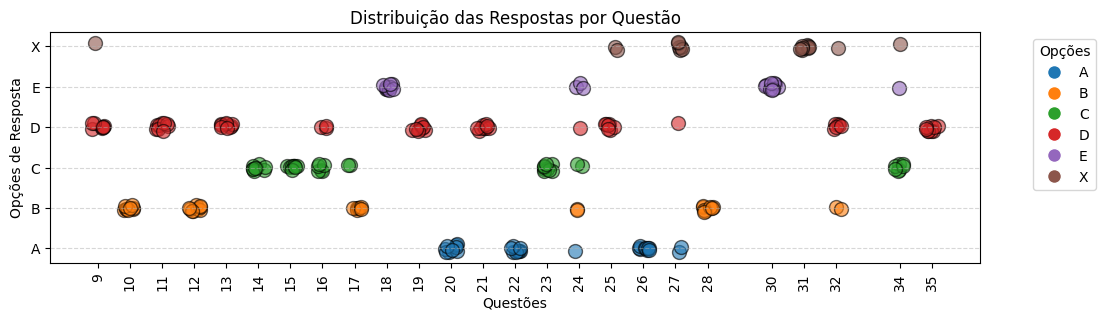

In [ ]:
calcular_metricas(modelo_deepseek)

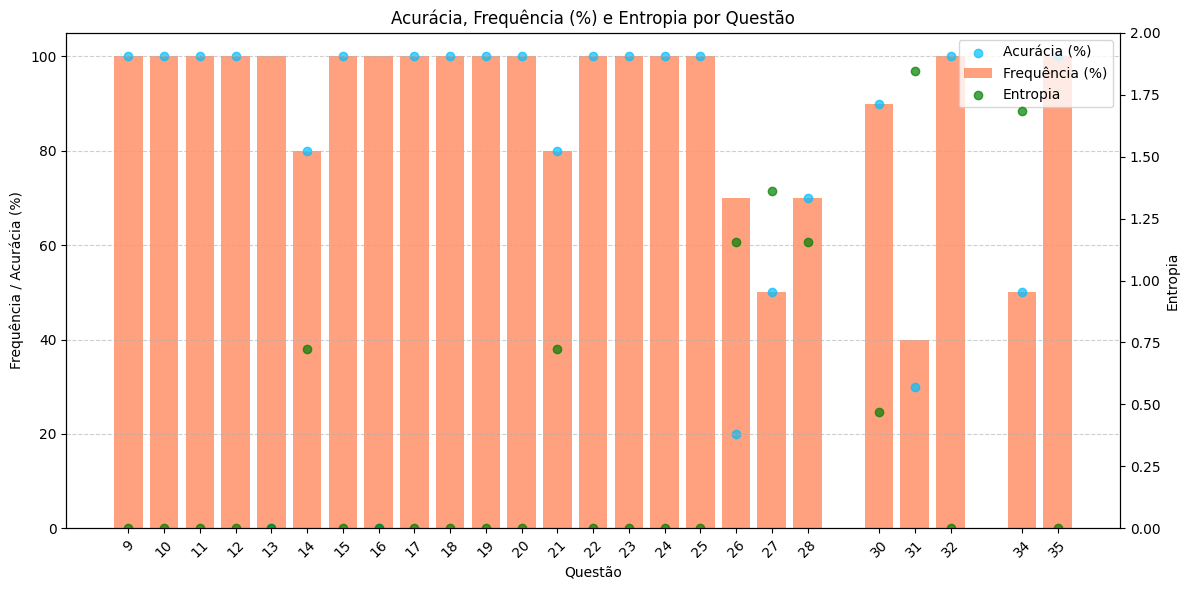

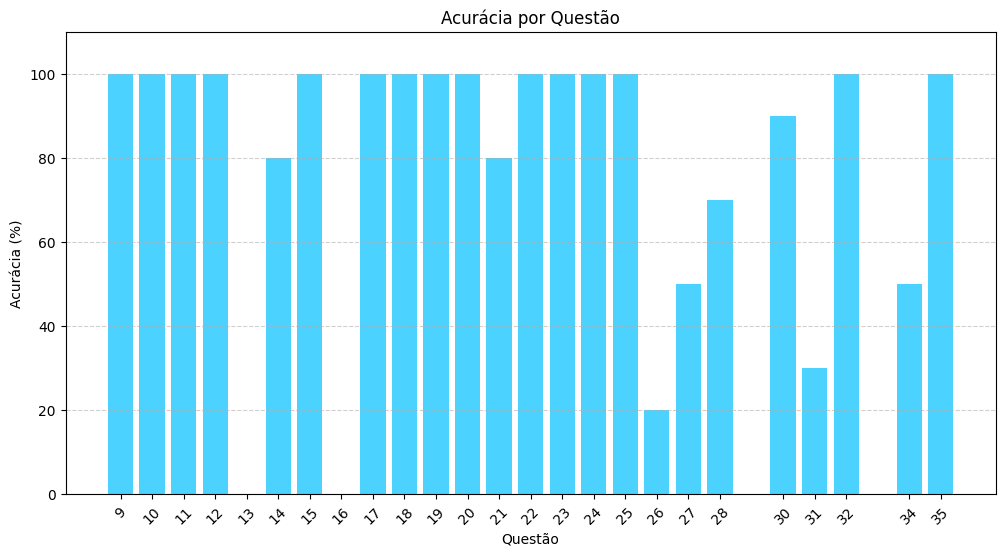

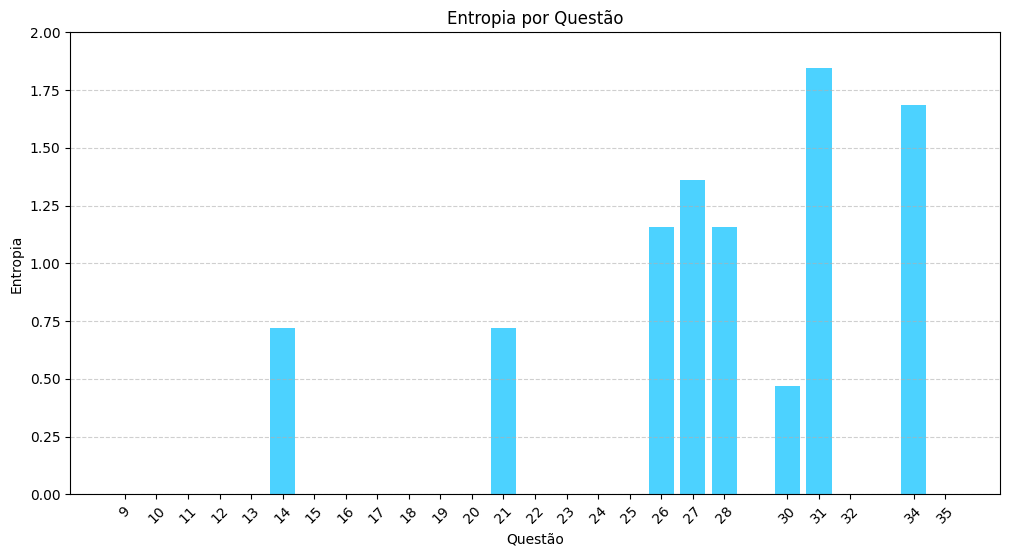

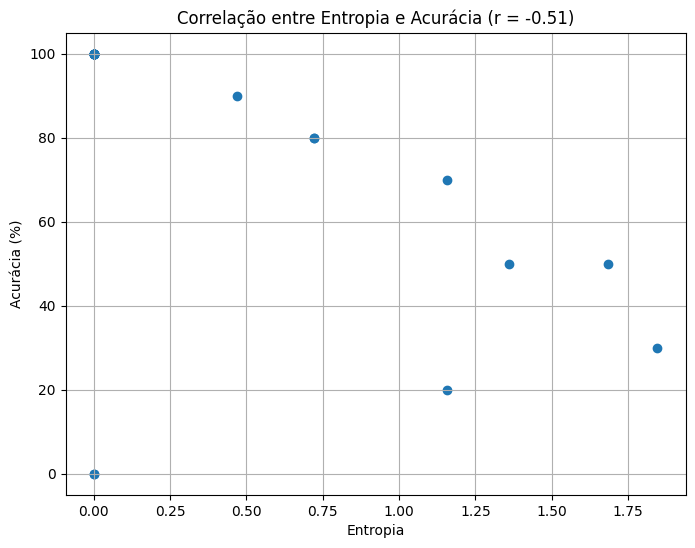

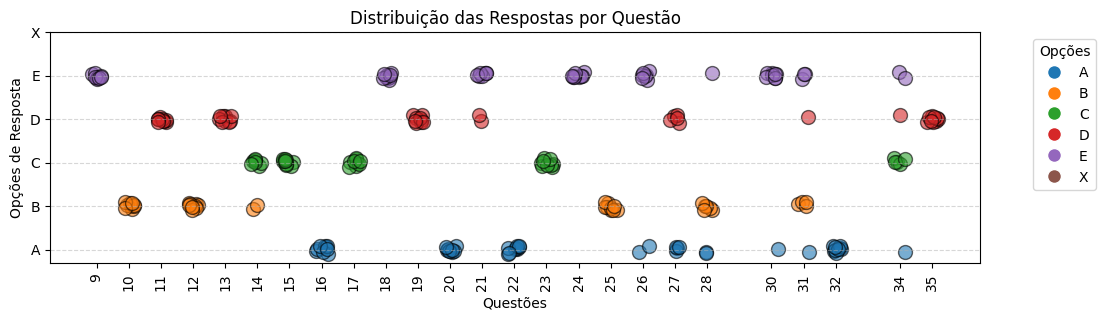

In [ ]:
calcular_metricas(modelo_gamini_2_flash)

In [ ]:
#TODO
#Contar o mais frequente e plotar junto com a taxa de acerto( empate tambem sera registrado) -------OK
#Por grafico em forma de curva-------OK
#Medicao da entropia de shannon-------OK
#Taxa de variacao
#Corelacao entre entropia e acuracia------OK
#duplo exito y usando a acuracia, taxa de repsosta e entropia -----OK
#usar seaborn
#pintar as questoes anuladas
#Colocar no colab -----OK